<a href="https://colab.research.google.com/github/MargoRita99/Machine-Learning/blob/main/%D0%9B%D0%A0_2_%D0%9C%D0%B0%D0%BA%D0%B0%D1%80%D0%BE%D0%B2%D0%B0_%D0%91%D0%98%D0%92%D0%A2_22_%D0%A1%D0%9F_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

## Логистическая регрессия
**Цель работы**  
Познакомиться с широко используемым методом бинарной классификации - логистической регрессией.

**Содержание работы**  
- Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.
- Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.
- Оценить качество построенной модели, используя метрики accuracy и F1-score.
- Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.
- Сравнить результаты двух реализаций.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Мы не будем брать готовые данные из файла, а сгенерируем наш датасет  
Воспользуемся функцией make_classification, Она лежит в пакете datasets библиотеки sklearn. Эта функция генерирует случайный набор данных по заданным параметрам

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

С помощью **n_samples** задаем количество точек (строки в таблице), равное 1000  
**n_features** задает количество столбцов  
**n_informative** задает количество признаков (столбцов), реально влияющих на значение целевой переменной  
**n_redundant** задает количество неинформативных признаков  
**n_classes** задает количество значений целевой переменной, то есть сколько вариантов будет целевой переменной  
**class_sep** насколько точки разных классов будут далеки друг от друга. Влияет на то, какой будет базовый уровень точности у модели классификации на этом датасете     
**random_state** влияет на генерацию случайных чисел. Если мы каждый раз будем запускать код, то каждый раз будут генерироваться новые значения. Чтобы этого избежать, задается случайное число, использующееся как ядро генератора случайных чисел

Выведем X - матрицу признаков и y - вектор целевых переменных

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

Выведем в виде датафрейма первые несколько строк X

In [ ]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


Попробуем на графике визуализировать распределение точек в задачах классификации  
По горизонтали - значения первой колонки  X[:, 0]  
По вертикали - значения второй колонки  X[:, 1]  
Чтобы изобразить данные сразу двуз классов используем условную индексацию [y==0] и [y==1]

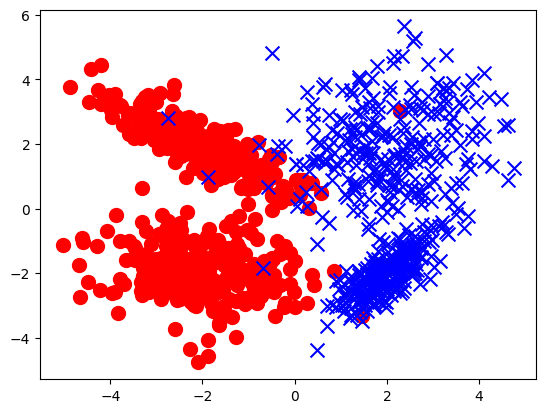

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

Теперь создадим объект логистической регрессии и попробовать как он работает на наших данных

Поскольку логистическая регрессия - это линейная модель, то работа с ней будет абсолютно идентична работе моделью линейной регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Делаем предсказание

In [ ]:
y_pred_lr = model.predict(X)

Подсчитаем score, который будет считать процент правильных ответов. То есть сколько на этом датасете модель угадывает классы правильно, а сколько неправильно

In [ ]:
model.score(X, y)

0.976

Теперь на изначальном графике изобразим значения, которые предсказывает модель. Попробуем сделать это градиентным графиком или контурным рисунком.

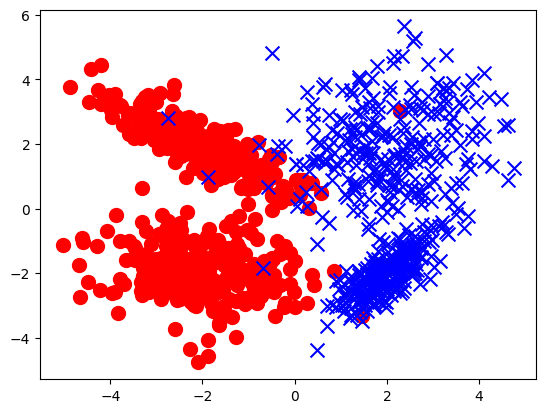

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

Разберем, как работает код, который рисует контурный график  
Контурный график будет строится следующим образом: для каждой точки этого графика будет построено предсказание, то есть теоретическое значение y  
Мы сделаем сетку из всех точек на этом графике и для каждой точки графика предскажем значение и по этим данным и будет строиться контурный график

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), # берем минимальное и максимальное значения в первом столбце и создаем распределение по x с шагом 0.01
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01) # +1 и -1 - это отступы
    )

Фнкция meshgrid создает двумерную таблицу из двух векторов и строит координатную сетку

In [ ]:
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Матрица точек сетки

In [ ]:
XX

array([[-6.03367039, -5.76154392],
       [-6.02367039, -5.76154392],
       [-6.01367039, -5.76154392],
       ...,
       [ 5.72632961,  6.62845608],
       [ 5.73632961,  6.62845608],
       [ 5.74632961,  6.62845608]])

Теперь по этой матрице посторим предсказание. Воспользуемся функцией predict_proba() - это метод, специфичный для модели логистической регрессии  
Если мы попытаемся воспользоваться обычной функцией predict(), то она вернет для каждой точки из массива XX точечное предсказание (либо 0 либо 1)  
А функция predict_proba() вернет нам значение самой функции гипотезы. Для каждой точки она выдает вероятность соотнесения к 0 классу и к первому классу



In [ ]:
Z = model.predict_proba(XX)

In [ ]:
Z

array([[9.99999999e-01, 5.40093903e-10],
       [9.99999999e-01, 5.57172000e-10],
       [9.99999999e-01, 5.74790116e-10],
       ...,
       [1.66264247e-09, 9.99999998e-01],
       [1.61168012e-09, 9.99999998e-01],
       [1.56228008e-09, 9.99999998e-01]])

In [ ]:
Z.shape

(1461960, 2)

Преобразуем этот массив в двумерный массив, соответствующий форме координатной сетки

In [ ]:
xx.shape

(1240, 1179)

Вот в такой форме должен быть и массив Z

In [ ]:
Z = model.predict_proba(XX)[:,0].reshape(xx.shape) # берем по первому столбцу

In [ ]:
Z.shape

(1240, 1179)

Данный код выполнит предсказание модели в каждой точке нашей сетки. Эти данные мы сможем использовать для того, чтобы построить контурный график вот так:

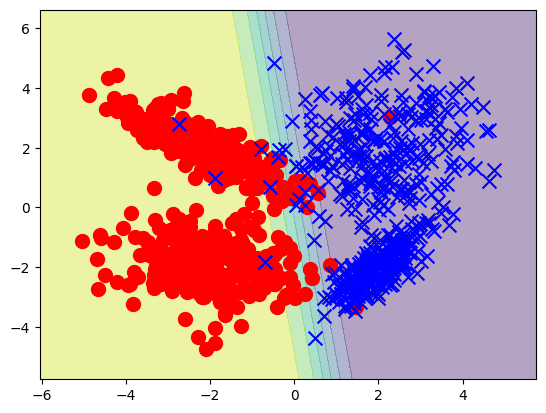

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

Контурный график принимает на вход матрицу координат по xx, yy и матрицу значений по Z и каждую точку красит в цвет, который соответствует значение Z в этой точке  
Желтый цвет означает, что значение близко к 1  
Фиолетовый цвет означает, что значение близко к 0  
Показывает вероятность отнесения к нулевому классу

Проверим вероятность отнесения к первому классу

In [ ]:
Z = model.predict_proba(XX)[:,1].reshape(xx.shape)

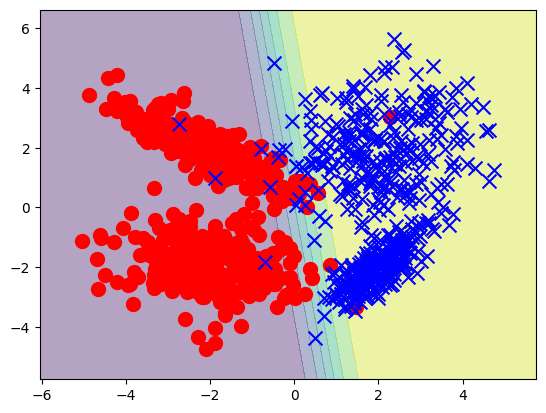

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

Также проверим у функции параметр levels - он задает количество уровней, которые мы считаем

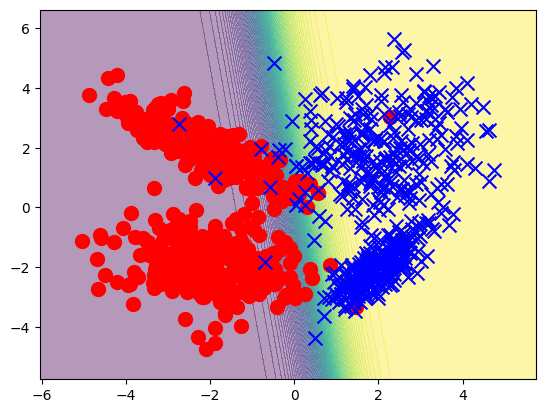

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4, levels=100)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

Данные точно такие же, однако переход стал более гладким. Так, как контурный график рисует линии одинакового уровня

Теперь вернмся в самое начало и изменим class_sep на 5



In [ ]:
X, y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=5,
                          random_state=1)

И посмотрим, что изменилось в модели

In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred_lr = model.predict(X)

In [ ]:
model.score(X, y)

0.997

Мы увидели увеличение точности модели. Потому что классы стали дальше друг от друга и датасет стал более линейно разделимым и модель стала лучше его понимать

Изобразим на графике

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), # берем минимальное и максимальное значения в первом столбце и создаем распределение по x с шагом 0.01
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01) # +1 и -1 - это отступы
    )

In [ ]:
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

In [ ]:
Z = model.predict_proba(XX)

In [ ]:
Z = model.predict_proba(XX)[:,0].reshape(xx.shape)

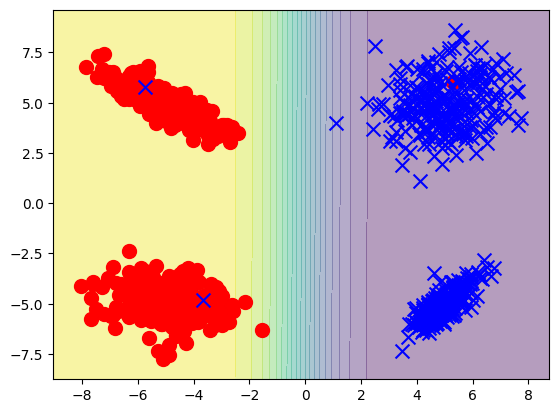

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4, levels=20)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

Если мы уменьшим class_sep до 1

In [ ]:
X, y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=1,
                          random_state=1)

In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred_lr = model.predict(X)

In [ ]:
model.score(X, y)

0.853

Точность модели сильно понизилась

Теперь пересчитаем на графике

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), # берем минимальное и максимальное значения в первом столбце и создаем распределение по x с шагом 0.01
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01) # +1 и -1 - это отступы
    )

In [ ]:
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

In [ ]:
Z = model.predict_proba(XX)

In [ ]:
Z = model.predict_proba(XX)[:,0].reshape(xx.shape)

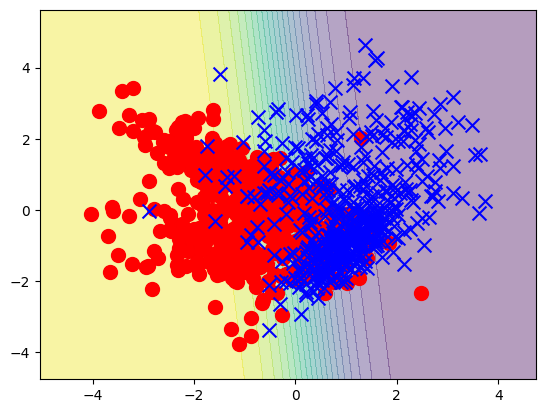

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4, levels=20)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

Положение границ примерно такое же, но большее количество точек располагается не с той стороны границы принятия решений

А если мы оставим четкую классификацию протсо значения 0 и 1



In [ ]:
Z = model.predict(XX).reshape(xx.shape)

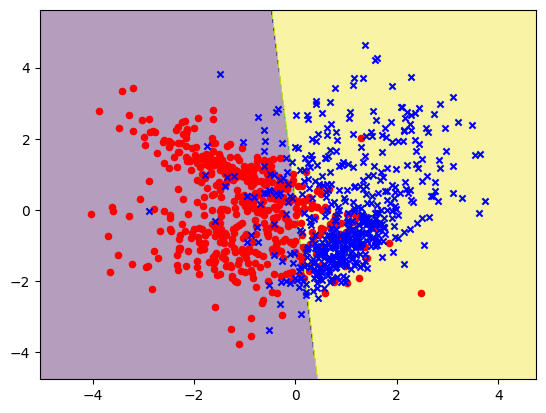

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4, levels=20)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

Без поля f контурный график будет рисоваться без заполнения

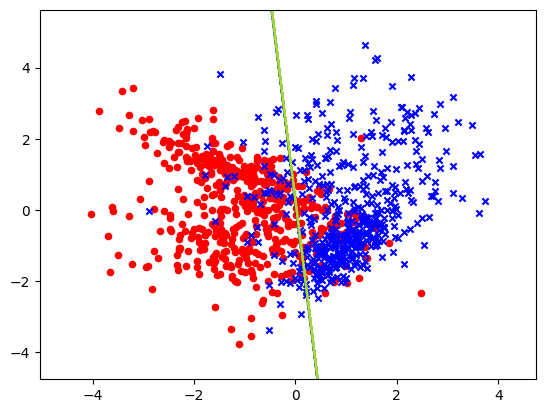

In [ ]:
plt.contour(xx, yy, Z, alpha=0.4, levels=20)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

### Дополнительные задания

Сгенерируем датасет с большим числом признаков и применим к нему созданную модель.

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification (n_samples=1000,
                          n_features=20,
                          n_informative=15,
                          n_redundant=5,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

Выведем X - матрицу признаков и y - вектор целевых переменных

In [ ]:
X.shape, y.shape

((1000, 20), (1000,))

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.474755,1.401655,2.203956,1.889407,1.917045,-4.079506,5.399612,1.724643,-3.865636,-8.240501,-2.222099,0.530038,2.012227,-1.689936,-1.530006,11.240087,-1.098228,-7.270619,-3.212906,-4.139579
1,1.848025,1.818419,-3.369947,-2.315206,-0.850836,-2.810581,4.027528,-0.888002,-1.728644,-9.605129,-3.374929,3.776886,4.357332,5.769087,-2.028062,14.855030,-5.706428,2.627033,1.786620,-2.276816
2,-2.900412,0.430982,-1.239064,-1.583895,1.359125,-2.251286,0.143750,2.546021,5.521895,-2.215055,0.227937,2.208501,2.890260,-3.132713,-2.752718,5.553912,11.738799,2.693187,-3.286137,0.903450
3,-0.012404,-2.482081,-1.578408,3.103057,-1.672274,-2.254941,2.951717,-2.463761,-1.489665,3.782577,-3.458270,1.843014,0.886633,1.924460,-0.997302,12.057740,-1.901858,-1.743639,1.123589,-3.264182
4,0.810943,-4.512168,1.238417,0.620751,-0.640087,-3.542865,3.840213,-3.299910,-0.983051,1.683239,0.776891,-0.883850,2.690899,1.024902,2.813630,8.730935,-7.688261,-4.156495,4.095232,-1.767354


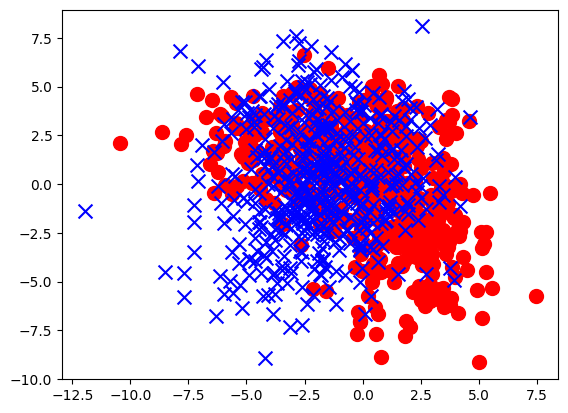

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred_lr = model.predict(X)

In [ ]:
model.score(X, y)

0.99

Мы видим, что появилось 20 столбцов и 1000 строк. Применили к данному датасету моели и значение метрики оказалось хорошим

Сгенерируем датасет с большим количеством классов и реализуем в классе алгоритм "один против всех". Решим задачу множественной классификации средствами sklearn.

In [ ]:
X, y = make_classification (n_samples=1000,
                          n_features=5,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=2,
                          n_clusters_per_class=1,
                          random_state=1)

В параметре n_classes указали количество классов, равное 4

Если у нас 4 класса, то мы тренируем 4 модели, каждая из которых:

Считает, что один из классов — это "положительный класс" (1)

А все остальные — "отрицательный класс" (0)
  
Когда приходит новый объект, все модели дают предсказания, и выбирается класс с наибольшей вероятностью.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
model_mc = LogisticRegression(multi_class='ovr', max_iter=1000) # включаем встроенный sklearn ovr
model_mc.fit(X, y)
y_pred_mc = model_mc.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print(classification_report(y, y_pred_mc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       249
           1       0.94      0.93      0.94       250
           2       0.99      0.99      0.99       251
           3       0.92      0.94      0.93       250

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



Метрики по каждому классу:  
Precision (точность) = сколько предсказанных моделью объектов этого класса действительно относятся к нему  
Recall (полнота) = сколько из реальных объектов этого класса модель правильно нашла  
F1-score = гармоническое среднее precision и recall  
Support = сколько в реальности объектов этого класса в тестовой выборке

Модель очень хорошо предсказывает все классы (accuracy = 96%)  
Наименее точный класс — класс 3, где precision = 0.92, recall = 0.94  
Самый лучший класс — класс 2, f1-score = 0.99

Создадим конструктор класса, реализующего градиентный спуск. Он будет инициализировать необходимые параметры для градиентного спуска.

In [ ]:
class SGD:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

Создадим класс, реализующего логистическую регрессию.

In [ ]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.T.dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred.astype(int)

In [ ]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

Создаем экземпляр класса

In [ ]:
logreg = LogReg()

Добавим фиктивный столбец единиц к матрице признаков X:

In [ ]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

Обучим модель и сделаем предсказание:

In [ ]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

Выводим метрики качества:

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


Проверим работу модели с другими значениями скорости обучения (alpha)

In [ ]:
for alpha in [0.01, 0.1, 0.5, 1.0, 10.0]:
    logreg = LogReg(alpha=alpha, n_iters=1000)
    logreg.fit(X, y)
    y_pred = logreg.predict(X)

    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f'alpha={alpha}: accuracy = {acc:.2f}, F1-score = {f1:.2f}')

alpha=0.01: accuracy = 0.97, F1-score = 0.97
alpha=0.1: accuracy = 0.98, F1-score = 0.98
alpha=0.5: accuracy = 0.98, F1-score = 0.98
alpha=1.0: accuracy = 0.98, F1-score = 0.98
alpha=10.0: accuracy = 0.98, F1-score = 0.98


Для alpha = 0.1, 0.5, 1.0, 10.0 точность (accuracy) и F1-score практически одинаковы (0.98).

Это значит, что модель успешно сходится даже при высокой скорости обучения.
При alpha = 0.01 немного хуже результат: accuracy = 0.97 вместо 0.98  
Это может означать, что градиентный спуск сходится медленнее, и за 1000 итераций он не достиг оптимального значения.

alpha = 10.0 не привело к ухудшению  
Обычно при очень большом alpha градиентный спуск может начать "скакать" и не сходиться.В данном случае это не произошло, возможно, из-за удобного масштаба данных.

Также поэкспериментируем с class_sep. Попробуем оизменяет его и посмотреть точность

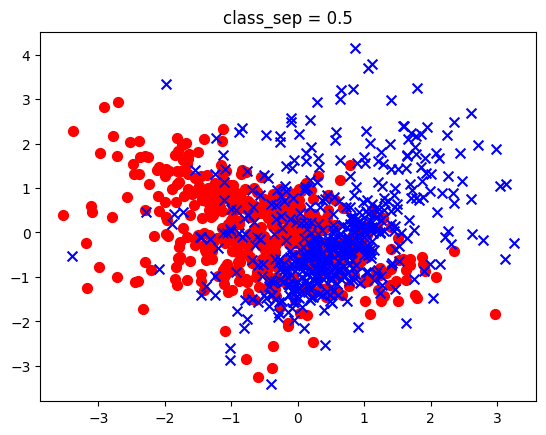

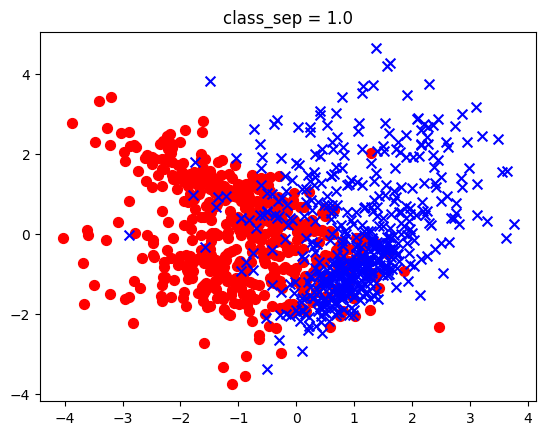

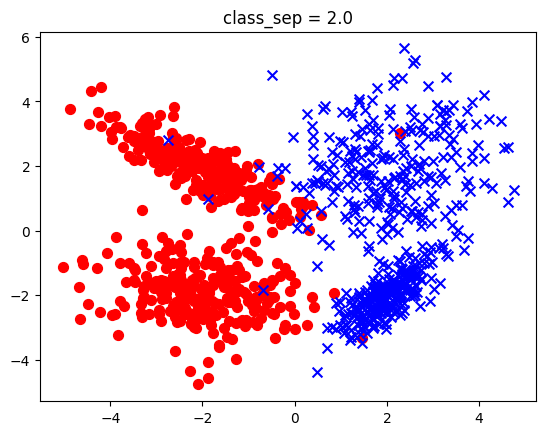

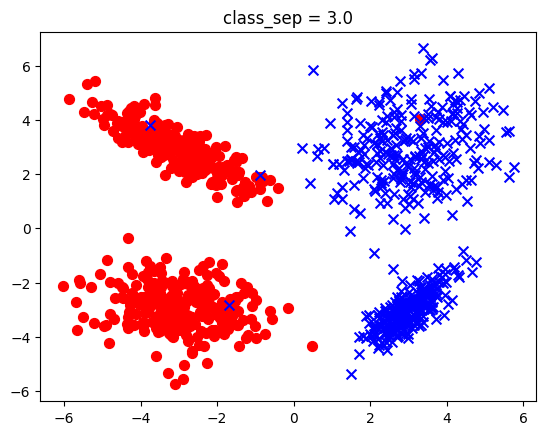

In [ ]:
for sep in [0.5, 1.0, 2.0, 3.0]:
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                               n_redundant=0, n_classes=2, class_sep=sep, random_state=1)

    plt.figure()
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=50)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=50)
    plt.title(f'class_sep = {sep}')
    plt.show()

Вывод: при большем class_sep классы лучше разделяются, а значит и выше точность модели

## Классификация на реальных данных
**Цель работы**  
Познакомиться с основными приемами работы с моделями классификации в scikit-learn.

**Содержание работы**  
- Загрузите данные о диагностике сахарного диабета.
- Постройте модель классификации для предсказания наличия заболевания.
- Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.
- Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

Возьмем датасет о диагностике сахарного диабета

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Мы вывели данные из таблицы:  
Каждая строка - некоторый пациент, его медицинские данные  
Целевая переменная - столбец Outcome (диагностирован или не диагностирован диабет)  
Основная задача по данному датасету - предсказать будет ли у пациента диабет

Перед началом моделирования убедимся, что данные подходят для моделирования. Они должны удовлетворять двум основным условиям:  
1) Отсутствие пропущенных значений  
2) Численный характер датасета

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Здесь мы видим 768 строк. Нулевых значений в датасете нет и мы видим числовые данные int и float  
Датасет чистый и не требует особенной предобработки

Теперь воспользуемся функцией describe(), которая показывает определенную статистику по всем численным колонкам. Данная функция работает только по численным данным

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Среднее значение (mean) показывает процент положительных значений. В данном случае 35% из 768 случаев положительные (диагностируемый диабет)

Теперь выделим целевую переменную и факторы

In [ ]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [ ]:
y.shape, X.shape

((768,), (768, 8))

Начнем моделирование

In [ ]:
from sklearn.linear_model import LogisticRegression

Создадим экземпляр и обучим

In [ ]:
logistic = LogisticRegression()
logistic.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

При обучении модели возникла ошибка, указывающая на то, что процесс обучения завершился по условию достижения максимального количества итераций, а не по условию стабилизации функции ошибки. Если функцию дольше оставить обучать, то ошибка снизится еще

С помощью атрибута max_iter можно увеличить количество итераций, чтобы модель дообучилась

In [ ]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

Выведем коэффициенты модели

In [ ]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.22481312e-01  3.51085717e-02 -1.33007000e-02  7.81917450e-04
 -1.17386223e-03  8.96453133e-02  8.68084149e-01  1.49863097e-02]


Посмотрим коэффициенты вместе с признаками

In [ ]:
_ = [print(k, f"{v:.3f}") for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.122
Glucose 0.035
BloodPressure -0.013
SkinThickness 0.001
Insulin -0.001
BMI 0.090
DiabetesPedigreeFunction 0.868
Age 0.015


Знак коэффициентов показывает направление связи: если знак отрицательный, то с повышением признака понижается вероятность принадлежности данного объекта к положительному классу  
Так признаки давления (BloodPressure) и инсулина (Insulin) имеют отрицательный знак, котрый и влияет на направление связи. Однако эти признаки имеют слишком маленькие значения и не особо влияют на целевую переменную    
Признак количества беременностей (Pregnancies) достаточно сильно влияет на вероятность развития диабета  
Признак наследственной склонности к диабету (DiabetesPedigreeFunction) имеет самое большое значение и сильнее всег влияет на целевую переменную (развитие диабета)  
Признаки (BMI, Glucose и Age) имеют не такое сильное влияние

Выведем значение свободного коэффициента

In [ ]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.36470855]


Теперь можно построить по полученной модели прогноз. Для этого передадим в соответствующий метод нашу матрицу признаков

In [ ]:
y_pred = logistic.predict(X)

Сравним вектор предсказанных значений с реальными значениями

In [ ]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


Во многом значения совпадают, однако ошибки тоже присутствуют. Однако вручную сравнивать результаты неудобно, поэтому используем  специальные функции - метрики

In [ ]:
from sklearn import metrics

Выведем матрицу классификаций, которая показывает какие объекты модель предсказала правильно, а какие нет

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]])

Выведем более наглядно с помощью библиотеки seaborn

In [ ]:
import seaborn as sns

Передадим матрицу функции heatmap

<Axes: >

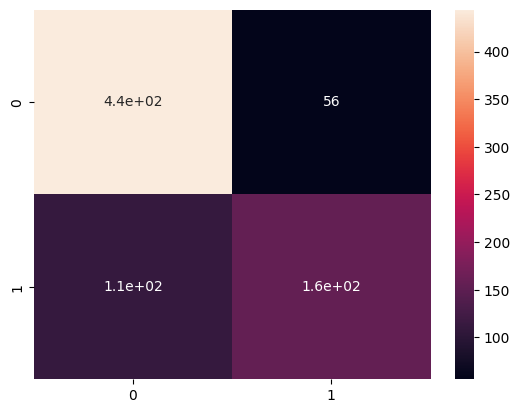

In [ ]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Что видно по графику:  
По горизонтали отложен предсказанный класс модели. Как модель классифицирует объекты  
0 - если модель относит объект к отрицательному классу  
1 - если к положительному  
По вертикали отложен реальный класс модели  
444 - число объектов, которые модель отнесла к отрицательным и они действительно отрицательные  
112 - количество объектов, которые модель посчитала отрицательными, но они на самом деле положительные  
56 - количество объектов, которые модель посчитала положительными, хотя они отрицательные  
156 - число объектов, которые модель отнесла к положительным и они действительно положительные

Выведем численную метрику

In [ ]:
logistic.score(X, y)

0.78125

Это доля правильно опознанных объектов. Значение метрики (0,78) показывает, что модель в среднем делает ошибки в 22% процентов случаев. Это основной показатель качества модели.

Попробуем построить полиномиальную модель. В библиотеке sklearn не предусмотрено отдельного класса полиномиальной модели. Ее можно создать через специальный объект PolynomialFeature, который добавляет полиномиальные признаки к данным.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Создаем объект преобразования. Указываем второй порядок

In [ ]:
poly = PolynomialFeatures(2)

 Используем этот объект для создания собственно самих признаков

In [ ]:
X_poly = poly.fit_transform(X)
X_poly.shape

(768, 45)

Видим, что появилось 45 признаков. Это потому что в исходном датасете было 8 признаков, а благодаря полиномиальной модели посчитались все комбинации признаков второго порядка

Теперь обучим модель полиномиальной регрессии

In [ ]:
polynomial = LogisticRegression(max_iter=10000)
polynomial.fit(X_poly, y)
y_pred_poly = polynomial.predict(X_poly)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Даже при количестве итераций в 10000 модель не обучается до концаю Это значит, что доплнительные признаки не оправдали себя

In [ ]:
polynomial.score(X_poly, y)

0.79296875

### Дополнительные задания

Попробуем изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
from sklearn import metrics

Посмотрим, улучшается ли точность при изменении количества итераций

Сначала поставим max_iter = 200

In [ ]:
logistic_exp = LogisticRegression(max_iter=200)
logistic_exp.fit(X, y)
y_pred2 = logistic_exp.predict(X)

Accuracy: 0.78125


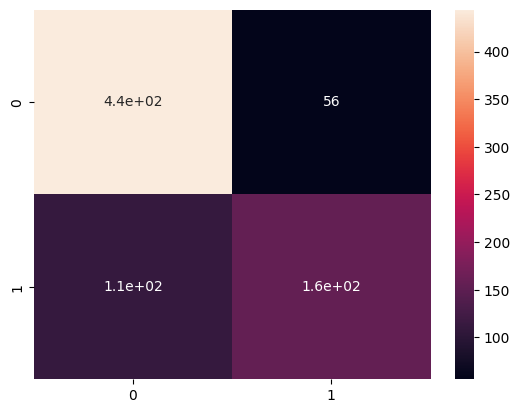

In [ ]:
print("Accuracy:", accuracy_score(y, y_pred2))

sns.heatmap(metrics.confusion_matrix(y, y_pred2), annot=True)
plt.show()

Увеличим значение количества итераций на max_iter=1000

Accuracy: 0.78125


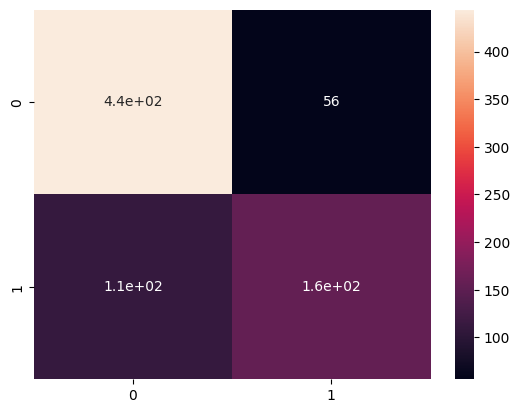

In [ ]:
logistic_exp = LogisticRegression(max_iter=10000)
logistic_exp.fit(X, y)
y_pred2 = logistic_exp.predict(X)

print("Accuracy:", accuracy_score(y, y_pred2))

sns.heatmap(metrics.confusion_matrix(y, y_pred2), annot=True)
plt.show()

Видим, что сколько бы итераций не ставили, точность не улучшается. Значит именно от данного значения наша модель не улучшается

Применение других моделей классификации

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier

Зададим список моделей, котрые мы хотим использовать

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "SVM (linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "SVM (poly)": SVC(kernel='poly'),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "Passive-Aggressive": PassiveAggressiveClassifier(max_iter=200),
    "Ridge Classifier": RidgeClassifier()
}

Logistic Regression: accuracy = 0.781


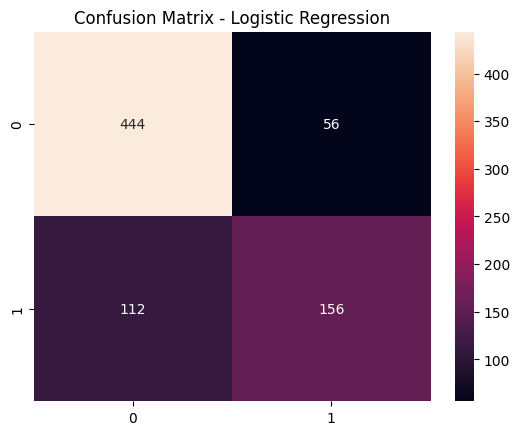

KNN: accuracy = 0.803


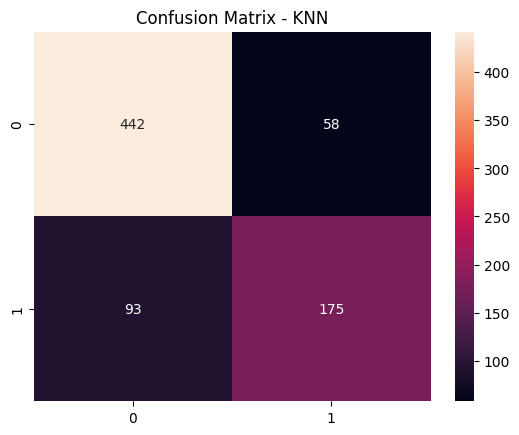

SVM (linear): accuracy = 0.777


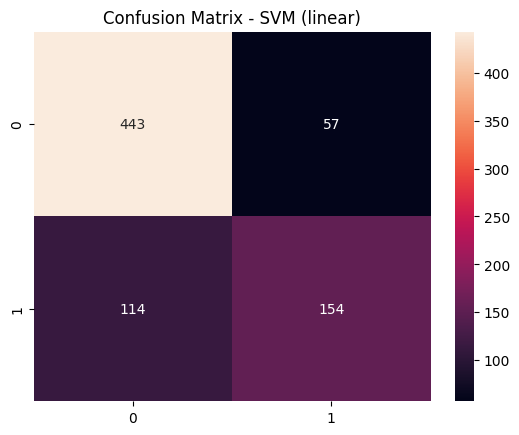

SVM (RBF): accuracy = 0.768


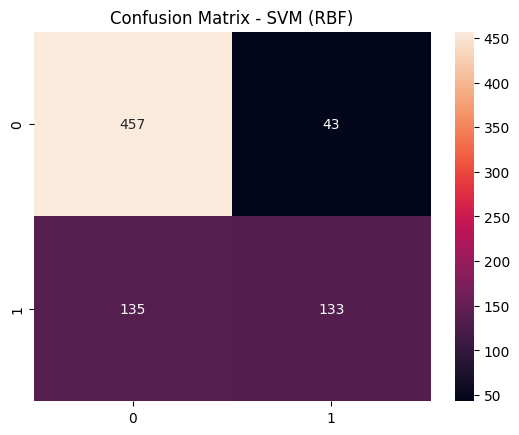

SVM (poly): accuracy = 0.776


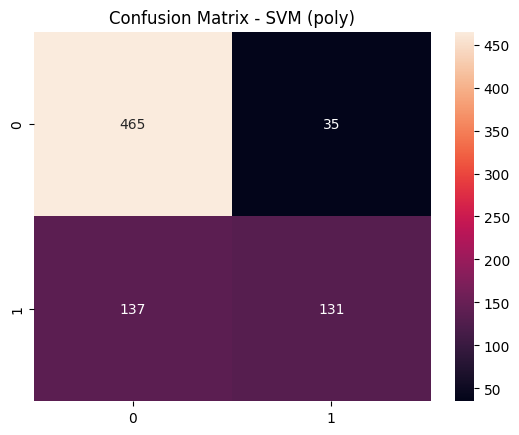

Naive Bayes: accuracy = 0.763


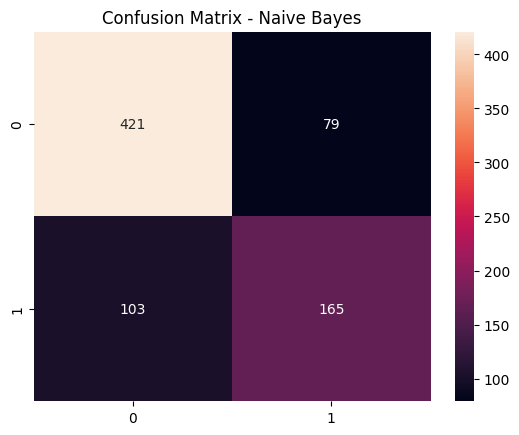

MLP: accuracy = 0.749


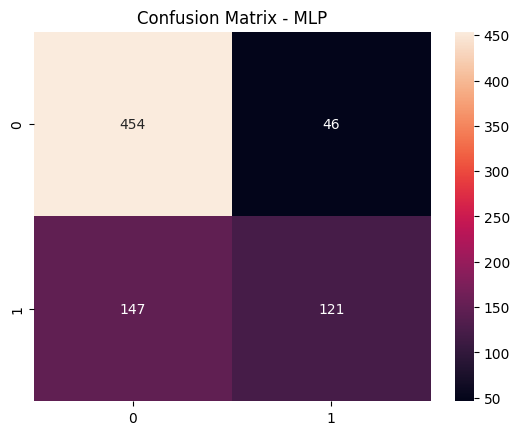

Decision Tree: accuracy = 1.000


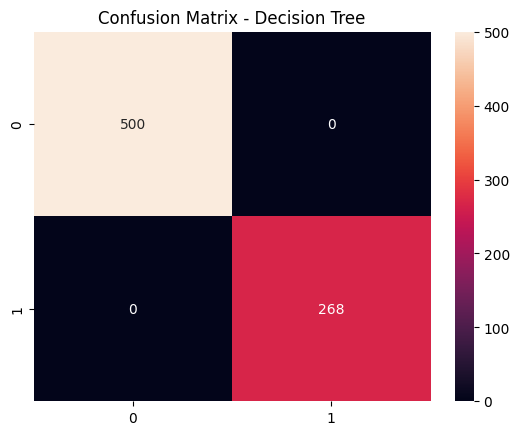

Random Forest: accuracy = 1.000


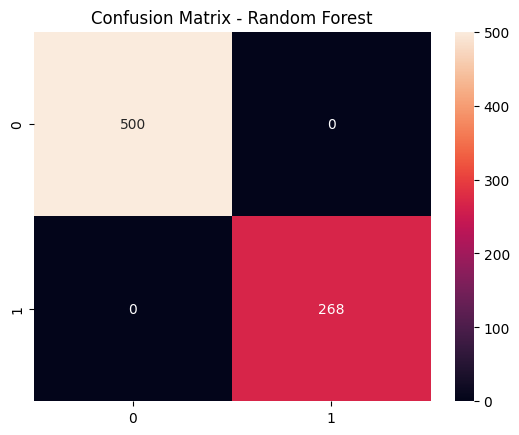

Bagging: accuracy = 0.975


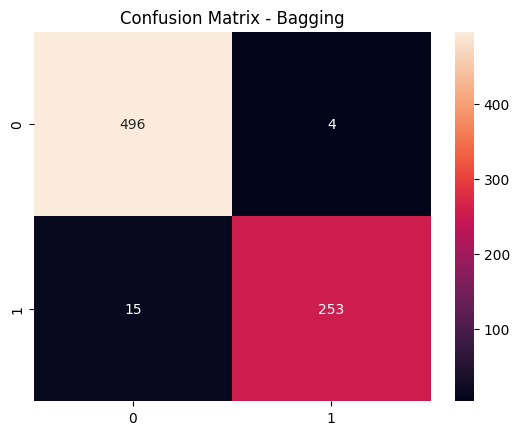

Passive-Aggressive: accuracy = 0.352


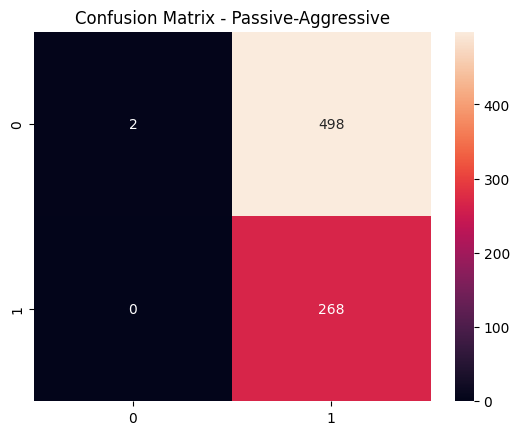

Ridge Classifier: accuracy = 0.783


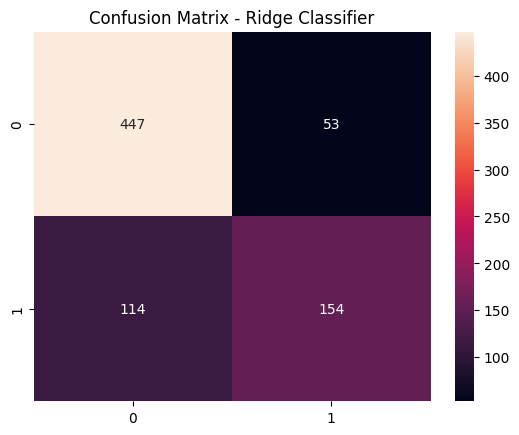

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "SVM (linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "SVM (poly)": SVC(kernel='poly'),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "Passive-Aggressive": PassiveAggressiveClassifier(max_iter=200),
    "Ridge Classifier": RidgeClassifier()
}
def evaluate_models(models, X, y):
    results = []
    for name, model in models.items():
        try:
            model.fit(X, y)
            y_pred = model.predict(X)
            acc = accuracy_score(y, y_pred)
            results.append((name, acc))
            print(f"{name}: accuracy = {acc:.3f}")
            sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True, fmt='d')
            plt.title(f"Confusion Matrix - {name}")
            plt.show()
        except Exception as e:
            print(f"{name}: ошибка — {e}")
    return results

results = evaluate_models(models, X, y)

Повторим полностью анализ для другой задачи - распознавание вида ириса по параметрам растения

Возьмем наш датасет

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

Преобразуем в DataFrame

In [ ]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Мы вывели данные из таблицы:
Каждая строка - растение  
Целевая переменная - столбец target (этот цветок является ирисом?)  
Основная задача по данному датасету - распознать вид ириса по параметрам растения

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Нулевых значений в датасете нет и мы видим числовые данные int и float  
Датасет чистый и не требует особенной предобработки

In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Видим, что у нас здесь могут быть три вида ириса: 0, 1 и 2  

In [ ]:
y = df_iris.target
X = df_iris.drop(["target"], axis=1)

In [ ]:
y.shape, X.shape

((150,), (150, 4))

Начнем моделирование

In [ ]:
from sklearn.linear_model import LogisticRegression

Создадим экземпляр и обучим

In [ ]:
logistic_ir = LogisticRegression(max_iter=1000)
logistic_ir.fit(X, y)

LogisticRegression(max_iter=1000)

Выведем коэффициенты модели

In [ ]:
print("Coefficients: \n", logistic_ir.coef_[0])

Coefficients: 
 [-0.42456599  0.96664261 -2.51554625 -1.08216927]


Посмотрим коэффициенты вместе с признаками

In [ ]:
_ = [print(k, f"{v:.3f}") for k, v in zip(X.columns, logistic_ir.coef_[0])]

sepal length (cm) -0.425
sepal width (cm) 0.967
petal length (cm) -2.516
petal width (cm) -1.082


Видим, что признак petal width влияет больше всего на целевую переменную и при этом имеет отрицательный знак. Что значит при уменьшении данного признака целевая переменная наоборот увеличивается  
Признак sepal width также имеет большое влияние на целевую переменную    
Признак sepal length вляет меньше всего на целевую переменную  


Выведем значение свободного коэффициента

In [ ]:
print("Intercept: \n", logistic_ir.intercept_)

Intercept: 
 [  9.85494228   2.23117432 -12.0861166 ]


Теперь можно построить по полученной модели прогноз. Для этого передадим в соответствующий метод нашу матрицу признаков

In [ ]:
y_pred_ir = logistic_ir.predict(X)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred_ir)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [ ]:
import seaborn as sns

<Axes: >

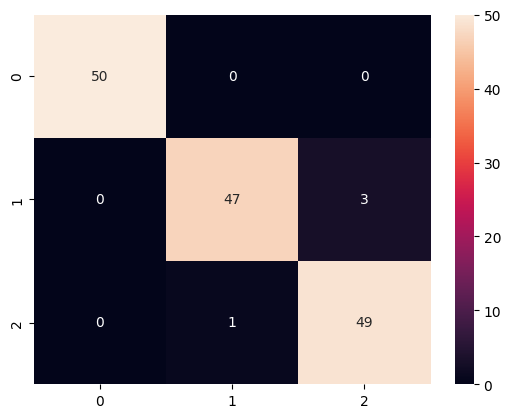

In [ ]:
sns.heatmap(metrics.confusion_matrix(y, y_pred_ir), annot=True)

In [ ]:
logistic_ir.score(X, y)

0.9733333333333334